#ライブラリのインポート

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
import numpy as np
import math
import pickle
import matplotlib.pyplot as plt

#データの用意


In [ ]:
b_size=1
transform = transforms.Compose([
    transforms.ToTensor()
])
dataset = datasets.MNIST('data/mnist', train=True, download=True, transform=transform)
data_loader = DataLoader(dataset, batch_size=b_size, shuffle=True)

Extracting data/mnist/MNIST/raw/train-images-idx3-ubyte.gz to data/mnist/MNIST/raw


Extracting data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to data/mnist/MNIST/raw



Extracting data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to data/mnist/MNIST/raw


Extracting data/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/mnist/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
for i,data in enumerate(data_loader):
  break
t_number=data[1].item()
input=data[0][0][0].numpy().copy()

#各種サイズ&重みの初期化

In [ ]:
fil1_size=4
fil1_chanel=16
pool1_filsize=5

fil2_size=3
fil2_chanel=32
pool2_filsize=3

weight_size=32
result_size=10

epoch=10
batch_size=1
lr=0.002

In [ ]:
input_size=input.shape[0]

conv1_size=input_size-(fil1_size-1)
pool1_size=conv1_size/pool1_filsize

conv2_size=pool1_size-(fil2_size-1)
pool2_size=conv2_size/pool2_filsize

In [ ]:
fil1=np.random.randn(int(fil1_chanel),int(fil1_size),int(fil1_size))
fil2=np.random.randn(fil2_chanel,fil1_chanel,fil2_size,fil2_size)
weight=np.random.randn(weight_size,int(result_size))

dw1=np.zeros((fil1_chanel,fil1_size,fil1_size))
dw2=np.zeros((fil2_chanel,fil1_chanel,fil2_size,fil2_size))
dw3=np.zeros((weight_size,int(result_size)))

#pool2_sub=np.zeros((fil2_chanel,int(conv2_size),int(conv2_size)))
#print(fil1.shape)

(16, 4, 4)


#学習

In [ ]:
loss_list=[]
for e in range(10): 
  c=0
  loss_sum=0
  p_sum=0
  for i,data in enumerate(data_loader):
    
    t_number=data[1].item()
    input=data[0][0][0].numpy().copy()
    conv1=np.zeros((fil1_chanel,int(conv1_size),int(conv1_size)))
    pooling1=np.zeros((fil1_chanel,int(pool1_size),int(pool1_size)))
    pooling1_sub=np.zeros((fil1_chanel,int(conv1_size),int(conv1_size)))

    conv2=np.zeros((fil2_chanel,int(conv2_size),int(conv2_size)))
    pooling2=np.zeros((fil2_chanel,int(pool2_size),int(pool2_size)))
    pooling2_sub=np.zeros((fil2_chanel,int(conv2_size),int(conv2_size)))

    loss,dw1,dw2,dw3,t=train(input,dw1,dw2,dw3)
    #loss_list.append(loss.sum().item())
    #print("---"*111)
    #print(f"損失{loss.sum()}")
    #print(dw1)
    #print(dw2)
    #print(dw3)
    loss_sum+=loss.sum().item()
    p_sum+=t

    if (i+1)%batch_size==0:
      c+=1
      #print(f"{c}/4960/{e}")
      fil1=fil1-((lr*dw1)/batch_size)
      #print("---"*10)
      fil2=fil2-((lr*dw2)/batch_size)
      weight=weight-((lr*dw3)/batch_size)
      #print(loss_sum)
      dw1=np.zeros((fil1_chanel,fil1_size,fil1_size))
      dw2=np.zeros((fil2_chanel,fil1_chanel,fil2_size,fil2_size))
      dw3=np.zeros((weight_size,int(result_size)))


    
    if (i+1)%25==0:
      #print(f"{c}/4960/{e}")
      #print(f"正解率{(100*p_sum)/25}%")
      loss_list.append(loss_sum)
      loss_sum=0
      p_sum=0

    if (i+1)%100==0:
      print(f"{c}/4960/{e}")

    if i==4960:
      print(f"エポック経過:{e+1}/{epoch}")
      lr=lr/1.77
      break

#損失を表示

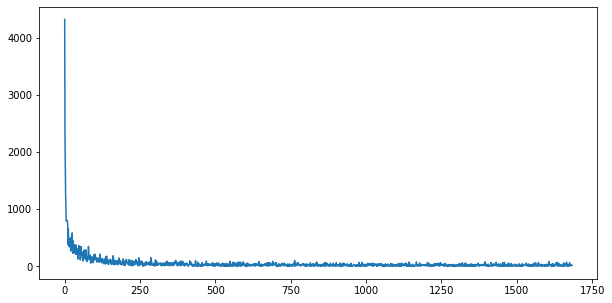

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(loss_list)
plt.legend
plt.show()

#第一畳み込み


In [ ]:
def c1(i):
  for i in range(fil1_chanel):
    for j in range(conv1_size):
      for k in range(conv1_size):
        
        slice_1=input[j:(fil1_size+j),k:(fil1_size+k)]
        temp=slice_1*fil1[i]
        conv1[i][j][k]=temp.sum().item()

#第一プーリング

In [ ]:
def p1():
  for i in range(fil1_chanel):
    for j in range(int(pool1_size)):
      for k in range(int(pool1_size)):
        jj=j+1
        kk=k+1
        temp=conv1[i]
        slice_2=temp[pool1_filsize*j:pool1_filsize*jj,pool1_filsize*k:pool1_filsize*kk]
        pooling1[i][j][k]=slice_2.max()
  #print(2)

In [ ]:
def sub1():
  for i in range(fil1_chanel):
    for j in range(0,int(conv1.shape[1]),pool1_filsize):
        for k in range(0,int(conv1.shape[1]),pool1_filsize):
          search=pooling1[i][int(j/pool1_filsize)][int(k/pool1_filsize)]
          for jj in range(j,j+pool1_filsize,1):
            for kk in range(k,k+pool1_filsize,1):
              if (search==conv1[i][jj][kk]):
                pooling1_sub[i][jj][kk]=1
 # print(3)

#第二畳み込み

In [ ]:
def c2():  
  for i in range(fil2_chanel):
    for ii in range(fil1_chanel):
      temp=pooling1[ii]
      for j in range(int(conv2_size)):
        for k in range(int(conv2_size)):
          slice_3=temp[j:(fil2_size+j),k:(3+k)]
          t=slice_3*fil2[i][ii]
          conv2[i][j][k]+=t.sum().item()
  #print(4)

#第二プーリング

In [ ]:
def p2():
  for i in range(fil2_chanel):
    for j in range(int(pool2_size)):
      for k in range(int(pool2_size)):
        jj=j+1
        kk=k+1
        temp=conv2[i]
        slice_4=temp[pool2_filsize*j:pool2_filsize*jj,pool2_filsize*k:pool2_filsize*kk]
        pooling2[i][j][k]=slice_4.max()
  #print(pooling2)

In [ ]:
def sub2():  
  for i in range(fil2_chanel):
    for j in range(0,int(conv2_size),fil2_size):
        for k in range(0,int(conv2_size),fil2_size):
          search=pooling2[i][int(j/fil2_size)][int(k/fil2_size)]
          for jj in range(j,j+fil2_size,1):
            for kk in range(k,k+fil2_size,1):
              if (search==conv2[i][jj][kk]):
                pooling2_sub[i][jj][kk]=1
  #print(6)    

#softmax関数の定義


In [ ]:
def softmax(a):
  a_max=max(a)
  x=np.exp(a-a_max)
  u=np.sum(x)
  return x/u

In [ ]:
def cross(t,s):
  #print(t.shape,s.shape)
  temp1=np.log(s)
  #temp2=np.ma.log(1-s)
  return -(t*temp1)

#全結合

In [ ]:
def zen():
  affine=pooling2.reshape(1,fil2_chanel)
  #print(affine)
  result=np.dot(affine,weight)
  soft=softmax(result[0])
  soft=np.where(soft==0,0.0001,soft)
  #print(soft)
  true=0
  #print(f"正解{t_number}予測{np.argmax(soft)}")
  if t_number==np.argmax(soft):
    true=1
  
  return affine,soft,true

#誤差計算

In [ ]:
def zen_back(affine,soft,dw3): 
  teacher=np.zeros(10)
  teacher[t_number]=1
  #print(soft)
  #print(teacher)
  loss=cross(teacher,soft)
  #print(loss.sum().item())
  error=(soft-teacher)
  #print(soft)
  #print(soft.sum())
  #df=soft*(1-soft)
  gamma5=error
  gamma5=gamma5.reshape(1,10)
  
  affine=affine.reshape(32,1)
  #print(affine)
  #print(gamma5)
  #print(dw3)
  dw3=np.dot(affine,gamma5)  
  #print(dw3)
  #print(error)
  
  return gamma5,loss,dw3

#pooling考慮の誤差

In [ ]:
def error_up1(gamma5):
  gamma4=np.dot(weight,gamma5[0].reshape(10,1))
  #print(gamma4)
  for i in range(fil2_chanel):
    for j in range(int(pool2_size)):
      for k in range(int(pool2_size)):
        jj=j+1
        kk=k+1
        target_1=gamma4[i]
        #print(target_1)
        temp=pooling2_sub[i]
        slice_5=temp[pool2_filsize*j:pool2_filsize*jj,pool2_filsize*k:pool2_filsize*kk]
        pooling2_sub[i][pool2_filsize*j:pool2_filsize*jj,pool2_filsize*k:pool2_filsize*kk]=slice_5*(target_1.item())
  gamma3=pooling2_sub
  #print(pooling2_sub)
  return gamma3

#誤差計算

In [ ]:
def conv2_back(gamma3,dw2): 
  for i in range(fil2_chanel):
    for j in range(fil1_chanel):
      for k in range(int(fil2_size)):#フィルタを二回移動
        for l in range(int(fil2_size)):
          slice_6=pooling1[j][k:int(conv2_size)+k,l:int(conv2_size)+l]
          temp=(slice_6*gamma3[i]).sum()
          dw2[i][j][k][l]=temp

  gamma2=np.zeros((fil1_chanel,int(pool1_size),int(pool1_size)))
  for i in range(fil1_chanel):
    for j in range(fil2_chanel):
      for k in range(int(pool1_size)):
        for l in range(int(pool1_size)):
          temp=gamma3[j]
          flip0=np.pad(temp,(2,2),'constant')
          slice_7=flip0[k:k+fil2_size,l:l+fil2_size]
          f=np.flip(fil2[j][i])
          gamma2[i][k][l]=(f*slice_7).sum()+gamma2[i][k][l]
  #print(gamma3[0])
  #print("==="*122)
  #print(pooling1[0])
  #print("==="*122)
  #print(dw2[0])
  return gamma2,dw2

#pooling考慮の誤差

In [ ]:
def error_up2(gamma2):
  gamma1=np.zeros((fil1_chanel,25,25))
  for i in range(fil1_chanel):
    for j in range(int(pool1_size)):
      for k in range(int(pool1_size)):
        jj=j+1 
        kk=k+1
        target=gamma2[i][j][k].item()
        slice_8=pooling1_sub[i][5*j:5*jj,5*k:5*kk]
        gamma1[i][5*j:5*jj,5*k:5*kk]=slice_8*target
  return gamma1

In [ ]:
def conv1_back(gamma1,dw1): 
  for j in range(fil1_chanel):
    for k in range(int(fil1_size)):#フィルタを二回移動
      for l in range(int(fil1_size)):
        slice_9=input[k:conv1_size+k,l:conv1_size+l]
        dw1[j][k][l]=(slice_9*gamma1[j]).sum()
    #print(slice_9)
    #print("--"*10)
  #print(dw1)
  return dw1

In [ ]:
def train(i,d1,d2,d3):
  
  c1(i)
  p1()
  sub1()

  c2()
  p2()
  sub2()

  a,s,t=zen()

  g5,loss,d3=zen_back(a,s,d3)
  g3=error_up1(g5)

  g2,d2=conv2_back(g3,d2)
  g1=error_up2(g2)

  d1=conv1_back(g1,d1)

  return loss,d1,d2,d3,t

#テスト用


In [ ]:
loss_list=[]
for e in range(1000): 
  loss_sum=0
  p_sum=0
  for i,data in enumerate(data_loader):
    
    t_number=data[1].item()
    input=data[0][0][0].numpy().copy()
    conv1=np.zeros((fil1_chanel,int(conv1_size),int(conv1_size)))
    pooling1=np.zeros((fil1_chanel,int(pool1_size),int(pool1_size)))
    pooling1_sub=np.zeros((fil1_chanel,int(conv1_size),int(conv1_size)))

    conv2=np.zeros((fil2_chanel,int(conv2_size),int(conv2_size)))
    pooling2=np.zeros((fil2_chanel,int(pool2_size),int(pool2_size)))
    pooling2_sub=np.zeros((fil2_chanel,int(conv2_size),int(conv2_size)))

    loss,dw1,dw2,dw3,t=train(input,dw1,dw2,dw3)
    #loss_list.append(loss.sum().item())
    #print("---"*111)
    #print(f"損失{loss.sum()}")
    #print(dw1)
    #print(dw2)
    #print(dw3)
    loss_sum+=loss.sum().item()
    p_sum+=t
  
    if (i+1)%100==0:
      print(f"正解率{(100*p_sum)/100}%")
      loss_list.append(loss_sum)
      loss_sum=0
      p_sum=0

    if i==5000:
      break

#モデルのセーブ

In [ ]:
cd drive/My\ Drive

/content/drive/My Drive


In [ ]:
with open("models/fil1_pkl","wb") as f1:
  pickle.dump(fil1,f1)
with open("models/fil2_.pkl","wb") as f2:
  pickle.dump(fil2,f2)
with open("models/weight_.pkl","wb") as w:
  pickle.dump(weight,w)
with open("models/loss_.pkl","wb") as l:
  pickle.dump(loss_list,l)

In [ ]:
with open("models/fil1_0819.pkl","rb") as f1:
  fil1=pickle.load(f1)
with open("models/fil2_0819.pkl","rb") as f2:
  fil2=pickle.load(f2)
with open("models/weight_0819.pkl","rb") as w:
  weight=pickle.load(w)
with open("models/loss_0819.pkl","rb") as l:
  loss_list=pickle.load(l)